<a href="https://colab.research.google.com/github/vishnuvarthanv/DataScience/blob/master/pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pycaret.org/blend-models/

In [1]:
#!pip install pycaret -q

     |████████████████████████████████| 301 kB 3.9 MB/s 
     |████████████████████████████████| 6.8 MB 45.8 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 15.6 MB 40.2 MB/s 
     |████████████████████████████████| 114 kB 55.1 MB/s 
     |████████████████████████████████| 261 kB 66.7 MB/s 
     |████████████████████████████████| 1.7 MB 60.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 56.2 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 1.3 MB 52.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 675 kB 67.5 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |███████████████████

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [9]:
train = pd.read_csv('titanic.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
X = train[['PassengerId','Survived','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
y=train['Pclass']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [30]:
test=train  # I am doing it for testing purpose

In [13]:
from pycaret.classification import *

In [14]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

,Description,Value
0,session_id,7105
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8154,0.8679,0.7027,0.8035,0.7448,0.6020,0.6090,0.106
lr,Logistic Regression,0.8075,0.8477,0.7157,0.7797,0.7430,0.5898,0.5945,0.464
ridge,Ridge Classifier,0.8075,0.0000,0.6910,0.7956,0.7356,0.5857,0.5928,0.014
lda,Linear Discriminant Analysis,0.8058,0.8468,0.6908,0.7937,0.7336,0.5824,0.5903,0.018
lightgbm,Light Gradient Boosting Machine,0.8040,0.8628,0.7113,0.7725,0.7375,0.5820,0.5861,0.080
ada,Ada Boost Classifier,0.7995,0.8545,0.7240,0.7593,0.7378,0.5759,0.5796,0.107
rf,Random Forest Classifier,0.7895,0.8530,0.7275,0.7398,0.7283,0.5573,0.5624,0.512
et,Extra Trees Classifier,0.7799,0.8205,0.7113,0.7244,0.7120,0.5350,0.5400,0.466
dt,Decision Tree Classifier,0.7575,0.7406,0.6660,0.7072,0.6810,0.4863,0.4911,0.016
knn,K Neighbors Classifier,0.7079,0.7276,0.5635,0.6457,0.6007,0.3721,0.3751,0.119


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7105, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
gbc  = create_model('gbc')    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8853,0.7600,0.8261,0.7917,0.6638,0.6653
1,0.7778,0.8863,0.8000,0.6897,0.7407,0.5482,0.5528
2,0.8413,0.8942,0.8000,0.8000,0.8000,0.6684,0.6684
3,0.8710,0.9337,0.7917,0.8636,0.8261,0.7238,0.7256
4,0.8387,0.8328,0.7083,0.8500,0.7727,0.6493,0.6558
5,0.8226,0.9002,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.8065,0.8136,0.6250,0.8333,0.7143,0.5724,0.5860
7,0.8387,0.8980,0.7083,0.8500,0.7727,0.6493,0.6558
8,0.7742,0.8279,0.6667,0.7273,0.6957,0.5167,0.5179
9,0.7419,0.8076,0.4583,0.7857,0.5789,0.4109,0.4420


In [18]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8895,0.6400,0.8889,0.7442,0.6169,0.6361
1,0.8413,0.9147,0.8000,0.8000,0.8000,0.6684,0.6684
2,0.8413,0.9116,0.6800,0.8947,0.7727,0.6542,0.6688
3,0.8548,0.8969,0.6667,0.9412,0.7805,0.6767,0.6992
4,0.8226,0.8213,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.8065,0.8958,0.6250,0.8333,0.7143,0.5724,0.5860
6,0.8226,0.8163,0.6250,0.8824,0.7317,0.6049,0.6249
7,0.8226,0.8838,0.6250,0.8824,0.7317,0.6049,0.6249
8,0.7903,0.8443,0.6250,0.7895,0.6977,0.5405,0.5491
9,0.7419,0.7664,0.3750,0.9000,0.5294,0.3907,0.4618


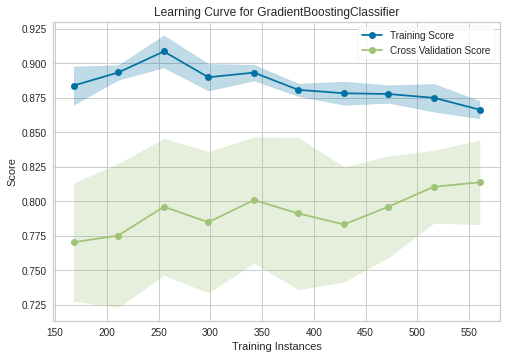

In [20]:
plot_model(estimator = tuned_gbc, plot = 'learning')

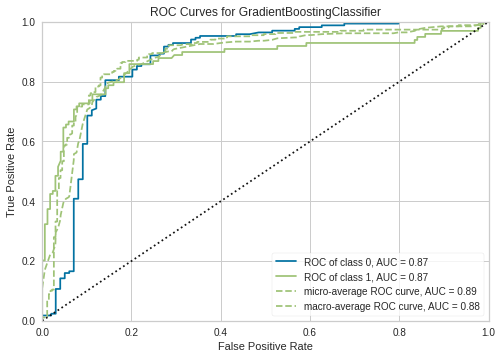

In [21]:
plot_model(estimator = tuned_gbc, plot = 'auc')

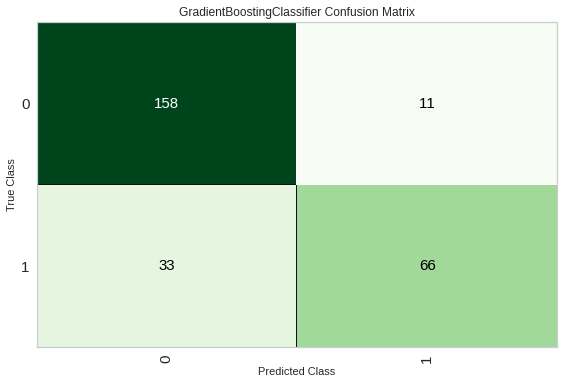

In [22]:
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

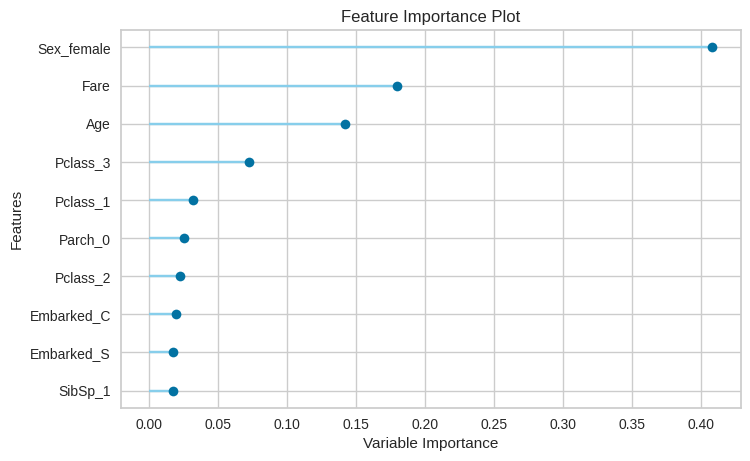

In [23]:
plot_model(estimator = tuned_gbc, plot = 'feature')

In [24]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
pip install shap -q

     |████████████████████████████████| 564 kB 4.2 MB/s 


In [28]:
#interpret_model(tuned_gbc)

TypeError: ignored

In [31]:
predict_model(tuned_gbc, data=test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.7399
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.7927
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.5132
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.7654
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.7973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0.7702
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0.7327
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0.6859
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0.5499


In [32]:
predictions = predict_model(tuned_gbc, data=test)
predictions.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.7399
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.7927
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.5132
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.7654
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.7973


In [34]:
round(predictions['Score']).astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Score, Length: 891, dtype: int64

In [36]:
test['Survived'] = round(predictions['Score']).astype(int)
#sub.to_csv('submission.csv',index=False)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


gbc	Gradient Boosting Classifier 

lr	Logistic Regression	 

ridge	Ridge Classifier	 

lda	Linear Discriminant Analysis 

lightgb
ada	Ada Boost Classifier

In [40]:
logr  = create_model('lr');
ridge = create_model('ridge')
lda = create_model('lda')
lightgbm = create_model('lightgbm')   
ada = create_model('ada')          

blend = blend_models(estimator_list=[tuned_gbc,logr, ridge,lda, lightgbm,ada])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.0,0.6400,0.7619,0.6957,0.5227,0.5277
1,0.7937,0.0,0.8000,0.7143,0.7547,0.5776,0.5804
2,0.7937,0.0,0.6800,0.7727,0.7234,0.5599,0.5628
3,0.8548,0.0,0.7500,0.8571,0.8000,0.6869,0.6906
4,0.8387,0.0,0.7083,0.8500,0.7727,0.6493,0.6558
5,0.8387,0.0,0.7500,0.8182,0.7826,0.6548,0.6564
6,0.7742,0.0,0.5417,0.8125,0.6500,0.4930,0.5151
7,0.8548,0.0,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.7903,0.0,0.7083,0.7391,0.7234,0.5547,0.5550
9,0.8226,0.0,0.5833,0.9333,0.7179,0.5984,0.6335


In [41]:
# train a voting classifier dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 5), method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.0,0.6400,0.7619,0.6957,0.5227,0.5277
1,0.7937,0.0,0.8400,0.7000,0.7636,0.5832,0.5908
2,0.7937,0.0,0.6800,0.7727,0.7234,0.5599,0.5628
3,0.8548,0.0,0.7500,0.8571,0.8000,0.6869,0.6906
4,0.8387,0.0,0.7083,0.8500,0.7727,0.6493,0.6558
5,0.8387,0.0,0.7500,0.8182,0.7826,0.6548,0.6564
6,0.7581,0.0,0.5833,0.7368,0.6512,0.4698,0.4773
7,0.8226,0.0,0.7083,0.8095,0.7556,0.6173,0.6207
8,0.7903,0.0,0.7083,0.7391,0.7234,0.5547,0.5550
9,0.8226,0.0,0.5833,0.9333,0.7179,0.5984,0.6335


In [43]:
# stacking models
stacker = stack_models(estimator_list = [ridge,lda,gbc], meta_model = gbc)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8747,0.7200,0.7826,0.7500,0.5966,0.5979
1,0.7937,0.8863,0.8400,0.7000,0.7636,0.5832,0.5908
2,0.8095,0.8937,0.7600,0.7600,0.7600,0.6021,0.6021
3,0.8065,0.9068,0.5833,0.8750,0.7000,0.5654,0.5908
4,0.8387,0.8103,0.7083,0.8500,0.7727,0.6493,0.6558
5,0.8065,0.8953,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.7258,0.7664,0.5000,0.7059,0.5854,0.3893,0.4023
7,0.8387,0.8673,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.7742,0.7977,0.7500,0.6923,0.7200,0.5313,0.5325
9,0.7258,0.7643,0.4167,0.7692,0.5405,0.3689,0.4041


In [44]:
# stack models dynamically
top5 = compare_models(n_select = 5)
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8537,0.7600,0.7308,0.7451,0.5719,0.5722
1,0.8095,0.8926,0.8400,0.7241,0.7778,0.6127,0.6179
2,0.8413,0.8905,0.7600,0.8261,0.7917,0.6638,0.6653
3,0.8710,0.9254,0.7500,0.9000,0.8182,0.7195,0.7266
4,0.8387,0.8098,0.7083,0.8500,0.7727,0.6493,0.6558
5,0.8226,0.8975,0.6250,0.8824,0.7317,0.6049,0.6249
6,0.7581,0.7747,0.5833,0.7368,0.6512,0.4698,0.4773
7,0.8226,0.8602,0.7083,0.8095,0.7556,0.6173,0.6207
8,0.8226,0.8361,0.7500,0.7826,0.7660,0.6232,0.6236
9,0.7258,0.8037,0.3750,0.8182,0.5143,0.3581,0.4110
